# Chapter 4 웹 스크레이핑을 사용한 데이터 분석

## 4.1 팬더스로 상장법인 목록 읽기

### 4.4.1. 한국거래소 기업공시채널에서 상장법인 목록 내려받기 

In [33]:
import pandas as pd

In [34]:
ticker = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

In [35]:
ticker.shape

(1368, 14)

In [37]:
ticker.head(10)

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,JS전선,005560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도,NaN,NaN,NaN,NaN,NaN
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시,NaN,NaN,NaN,NaN,NaN
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도,NaN,NaN,NaN,NaN,NaN
3,교보메리츠,064900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시,NaN,NaN,NaN,NaN,NaN
4,국제관광공사,028780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,굿리치경매1,085450,NaN,부동산 임대 및 공급,2005-09-06,05월,굿앤리치자산운용,http://www.goodnrich.co.kr,서울특별시,NaN,NaN,NaN,NaN,NaN
6,그린손해보험,000470,보험업,"손해보험(자동차,화재,해상,특종,장기보험)",1975-06-30,03월,라용규,http://www.greeninsu.com,서울특별시,NaN,NaN,NaN,NaN,NaN
7,극동건설,000980,NaN,"건축공사,토목공사,아파트건설,도로포장공사,플랜트설치공사,전기공사,전기통신공사/기술용...",1976-12-13,12월,여동진,http://www.kukdong.co.kr,서울특별시,NaN,NaN,NaN,NaN,NaN
8,금성산업,028930,NaN,NaN,1976-12-28,12월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,금호케미칼,014740,NaN,NaN,1984-05-29,12월,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.4.3. 네이버 일별 시세 맨 뒤 페이지 구하기

In [38]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

In [39]:
url = 'http://finance.naver.com/item/sise_day.nhn?code=251270'

with urlopen(url) as doc :
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_ = 'pdRR')
    print(pgrr.a['href'])

AttributeError: 'NoneType' object has no attribute 'a'

In [41]:
print(doc)

---------------------------------------------------
urlopen 이 해당 url 의 html 소스를 제대로 가져오지 못했음!!

In [42]:
code = '251270' 
url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)

with requests.get(url) as res :
    res.encoding = 'utf-8'
    res.status_code

    html = BeautifulSoup(res.text, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    temp = str(pgrr.a['href']).split('=')
    last_page = temp[-1]

    print(last_page)

85


In [43]:
print(pgrr)

<td class="pgRR">
<a href="/item/sise_day.nhn?code=251270&amp;page=85">�ǵ�
				<img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
</a>
</td>


In [44]:
pgrr.a['href']

'/item/sise_day.nhn?code=251270&page=85'

In [45]:
str(pgrr.a['href']).split('=')

['/item/sise_day.nhn?code', '251270&page', '85']

In [47]:
# print(res.text)

 참고 : http://blog.quantylab.com/crawling_naverfin_daycandle.html

### 4.4.4 전체 페이지 읽어오기 

In [48]:
df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=251270'

from tqdm import tqdm
for page in tqdm(range(1, int(last_page) + 1)) :
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(page_url, header = 0)[0])
    
df = df.dropna() # equivalent to 'df.dropna(inplace = True)'

In [49]:
print("top 5")
print(df.head())
print("\n")
print("last 5")
print(df.tail())
print("\n")
print("dimesion of 'df' is", df.shape)

top 5
           날짜        종가      전일비        시가        고가        저가        거래량
1  2020.10.21  133000.0   2500.0  135500.0  136500.0  131000.0   379484.0
2  2020.10.20  135500.0   2500.0  132500.0  136000.0  130500.0   529898.0
3  2020.10.19  133000.0   3500.0  136000.0  137500.0  133000.0   562067.0
4  2020.10.16  136500.0    500.0  136000.0  140500.0  134000.0   939361.0
5  2020.10.15  137000.0  15000.0  154500.0  154500.0  135000.0  1995819.0


last 5
           날짜        종가      전일비        시가        고가        저가        거래량
1  2017.05.18  148000.0   4000.0  144000.0  149500.0  142000.0  1587826.0
2  2017.05.17  144000.0  12000.0  153000.0  154500.0  142000.0  2006418.0
3  2017.05.16  156000.0   4000.0  161500.0  162500.0  156000.0  1146762.0
4  2017.05.15  160000.0   2000.0  159000.0  165500.0  158000.0  1504154.0
5  2017.05.12  162000.0   3000.0  165000.0  171500.0  157000.0  6368916.0


dimesion of 'df' is (845, 7)


## 4.5 OHLC와 캔들 차트

- Open - High - Low - Close = 시가 - 고가 - 저가 - 종가
- 바 차트 (미쿡) vs 캔들 차트 (니뽄)
        - Bullish : 상승, 양봉 
        - Bearish : 하락, 음봉

### 4.5.2 넷마블 종가 차트

In [50]:
from matplotlib import pyplot as plt

In [51]:
df_part = df.iloc[0:30]
df_part = df_part.sort_values(by = '날짜')
print(df_part)

            날짜        종가      전일비        시가        고가        저가        거래량
13  2020.09.04  197500.0   3000.0  188500.0  200000.0  188000.0  2571667.0
12  2020.09.07  193500.0   4000.0  204000.0  204500.0  193000.0  1160050.0
11  2020.09.08  193000.0    500.0  193500.0  197000.0  188500.0   831827.0
10  2020.09.09  189000.0   4000.0  190000.0  194500.0  188500.0   777175.0
9   2020.09.10  187000.0   2000.0  195000.0  195000.0  181000.0  1339368.0
5   2020.09.11  183500.0   3500.0  185500.0  188500.0  182000.0   528319.0
4   2020.09.14  181500.0   2000.0  183500.0  184000.0  176500.0   684796.0
3   2020.09.15  184500.0   3000.0  179000.0  186500.0  178000.0   548135.0
2   2020.09.16  182500.0   2000.0  184500.0  187000.0  182000.0   325331.0
1   2020.09.17  180500.0   2000.0  180500.0  184000.0  179500.0   410928.0
13  2020.09.18  186000.0   5500.0  182000.0  189000.0  181000.0   689778.0
12  2020.09.21  188000.0   2000.0  188500.0  191000.0  185500.0   505537.0
11  2020.09.22  181000.0 

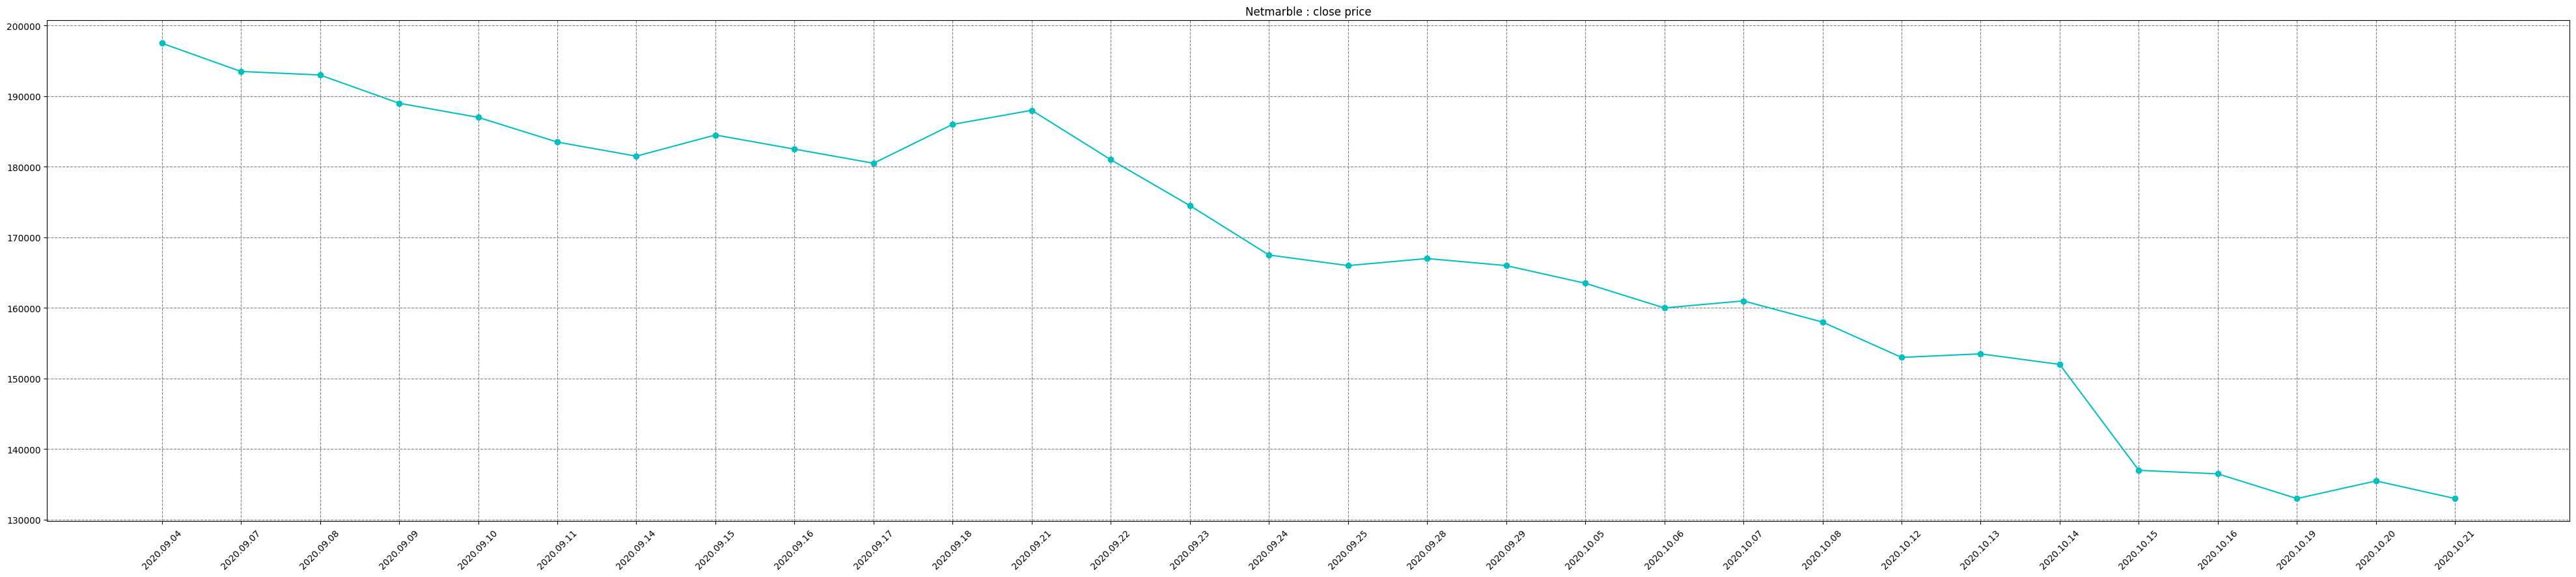

In [52]:
plt.figure(figsize = (50, 10)) # 위치에 따라 다름

plt.title('Netmarble : close price')
plt.xticks(rotation = 45)

plt.plot(df_part['날짜'], df_part['종가'], 'co-')
plt.grid(color = 'gray', linestyle = '--')

plt.show()

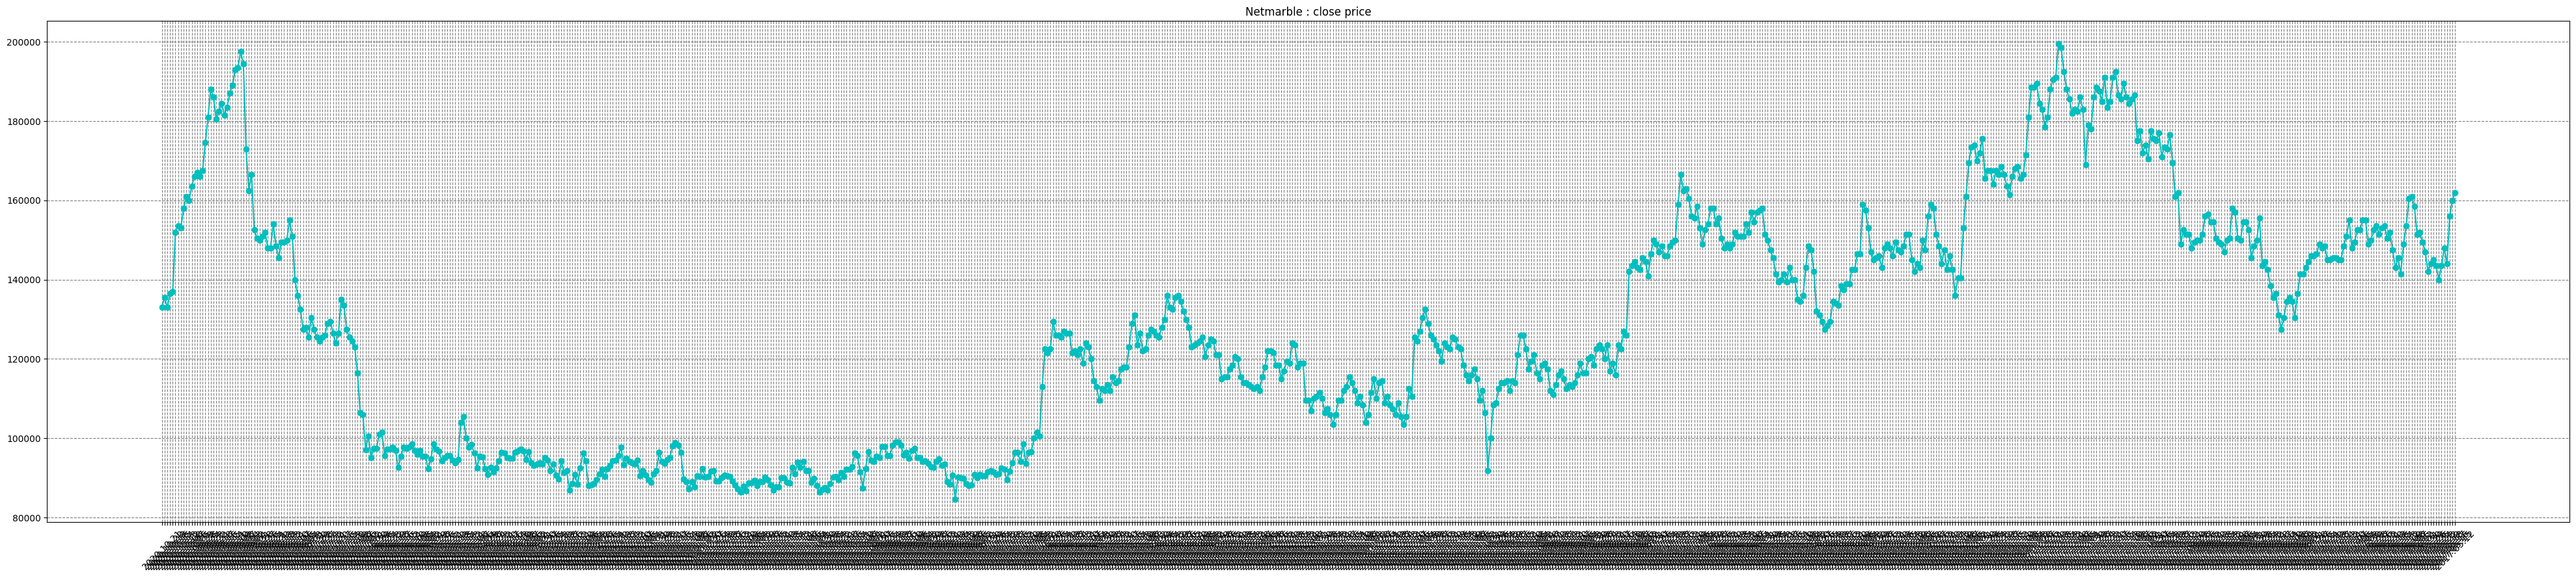

In [53]:
plt.figure(figsize = (50, 10))

plt.title('Netmarble : close price')
plt.xticks(rotation = 45)

plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color = 'gray', linestyle = '--')

plt.show()

### 4.5.3 넷마블 캔들 차트 

In [54]:
# ! pip install mpl_finance

from matplotlib import dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime

In [57]:
a = datetime.strptime(df_part['날짜'].values[0], '%Y.%m.%d').date()
print(a)
a2 = mdates.date2num(a) 
print(a2)

2020-09-04
737672.0


#### 구버전으로 캔들 차트 그리기 
- time 변수 변환

In [58]:
# 데이터 가공 
# candlestick_ohlc() 의 인자 = (time, open, high, low, close, ... )
# time 인자의 경우 반드시 float 형 !

for idx in range(0, len(df_part)) : 
    dt_part = datetime.strptime(df_part['날짜'].values[idx], '%Y.%m.%d').date()
    df_part['날짜'].values[idx] = mdates.date2num(dt_part) 

In [59]:
ohlc = df_part[['날짜', '시가', '고가', '저가', '종가']]
print(df_part)

        날짜        종가      전일비        시가        고가        저가        거래량
13  737672  197500.0   3000.0  188500.0  200000.0  188000.0  2571667.0
12  737675  193500.0   4000.0  204000.0  204500.0  193000.0  1160050.0
11  737676  193000.0    500.0  193500.0  197000.0  188500.0   831827.0
10  737677  189000.0   4000.0  190000.0  194500.0  188500.0   777175.0
9   737678  187000.0   2000.0  195000.0  195000.0  181000.0  1339368.0
5   737679  183500.0   3500.0  185500.0  188500.0  182000.0   528319.0
4   737682  181500.0   2000.0  183500.0  184000.0  176500.0   684796.0
3   737683  184500.0   3000.0  179000.0  186500.0  178000.0   548135.0
2   737684  182500.0   2000.0  184500.0  187000.0  182000.0   325331.0
1   737685  180500.0   2000.0  180500.0  184000.0  179500.0   410928.0
13  737686  186000.0   5500.0  182000.0  189000.0  181000.0   689778.0
12  737689  188000.0   2000.0  188500.0  191000.0  185500.0   505537.0
11  737690  181000.0   7000.0  188000.0  190000.0  180000.0   626845.0
10  73

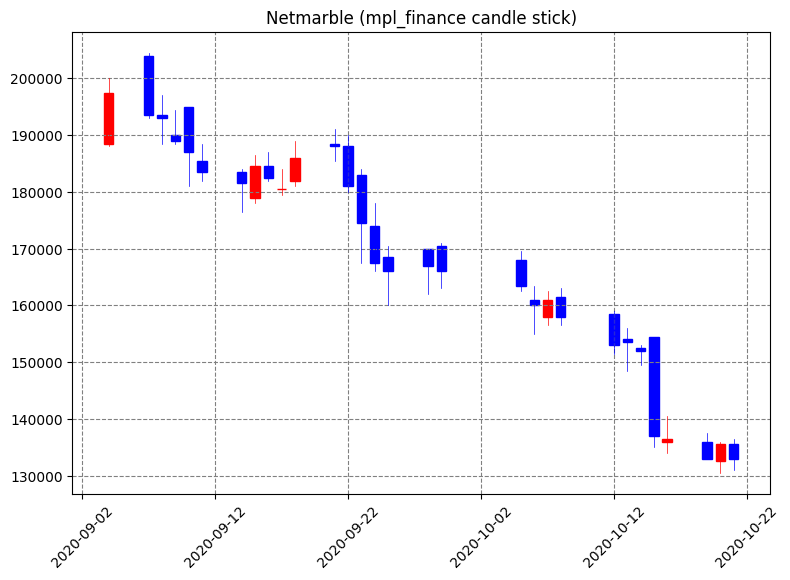

In [60]:
plt.figure(figsize = (9, 6))

ax = plt.subplot(1, 1, 1)
plt.title('Netmarble (mpl_finance candle stick)')

candlestick_ohlc(ax, ohlc.values, width = 0.7, colorup = 'red', colordown = 'blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation = 45)
plt.grid(color = 'gray', linestyle = '--')
plt.show()

#### 신버전으로 캔들 차트 그리기

In [27]:
# ! pip install --upgrade mplfinance
import mplfinance as mpf

In [61]:
# 데이터 가공 
# mpf.plot(time, open, high, low, close, volume)
# time 인자의 수정 필요 없음!

df_part = df.iloc[0:30, [0, 1, 3, 4, 5, 6]]
df_part = df_part.rename(columns = {'날짜' : 'Date', 
                                    '시가' : 'Open', 
                                    '고가' : 'High',
                                    '저가' : 'Low',
                                    '종가' : 'Close',
                                    '거래량': 'Volume'})
df_part = df_part.sort_values(by = 'Date')
df_part.index = pd.to_datetime(df_part.Date)
df_part = df_part[['Open', 'High', 'Low', 'Close', 'Volume']]
print(df_part)

                Open      High       Low     Close     Volume
Date                                                         
2020-09-04  188500.0  200000.0  188000.0  197500.0  2571667.0
2020-09-07  204000.0  204500.0  193000.0  193500.0  1160050.0
2020-09-08  193500.0  197000.0  188500.0  193000.0   831827.0
2020-09-09  190000.0  194500.0  188500.0  189000.0   777175.0
2020-09-10  195000.0  195000.0  181000.0  187000.0  1339368.0
2020-09-11  185500.0  188500.0  182000.0  183500.0   528319.0
2020-09-14  183500.0  184000.0  176500.0  181500.0   684796.0
2020-09-15  179000.0  186500.0  178000.0  184500.0   548135.0
2020-09-16  184500.0  187000.0  182000.0  182500.0   325331.0
2020-09-17  180500.0  184000.0  179500.0  180500.0   410928.0
2020-09-18  182000.0  189000.0  181000.0  186000.0   689778.0
2020-09-21  188500.0  191000.0  185500.0  188000.0   505537.0
2020-09-22  188000.0  190000.0  180000.0  181000.0   626845.0
2020-09-23  183000.0  184000.0  167500.0  174500.0   904823.0
2020-09-

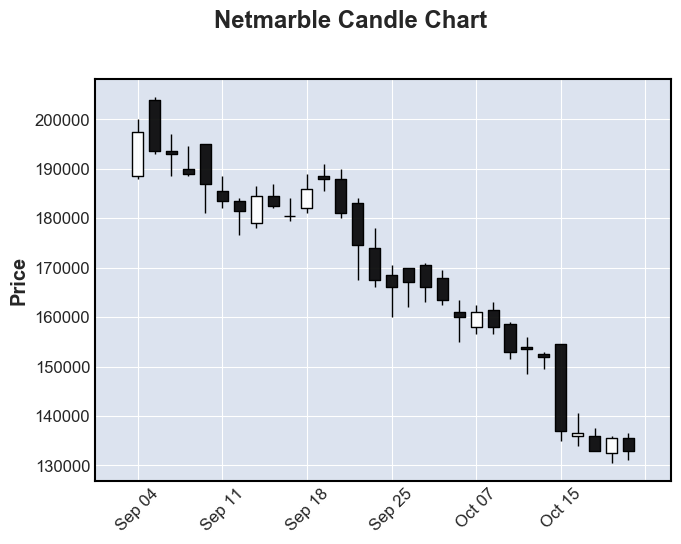

In [62]:
mpf.plot(df_part, title = 'Netmarble Candle Chart', type = 'candle')

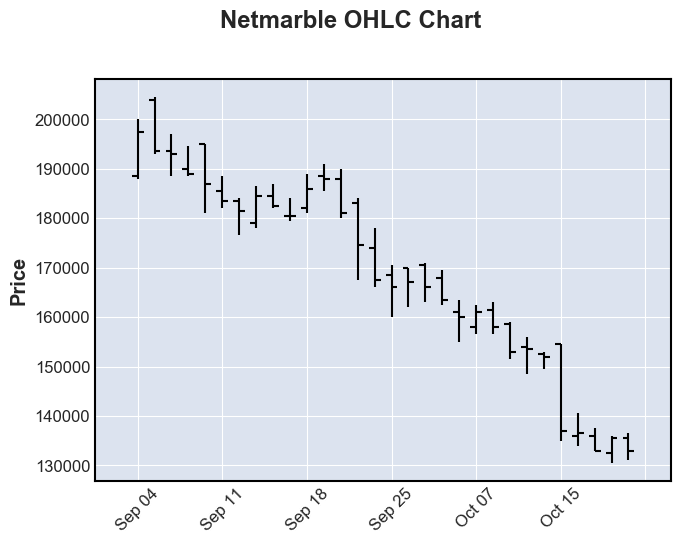

In [63]:
mpf.plot(df_part, title = 'Netmarble OHLC Chart', type = 'ohlc')

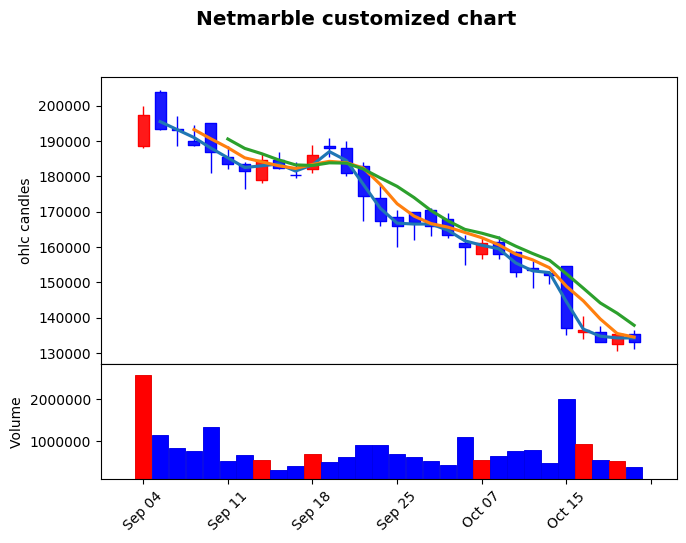

In [64]:
kwargs = dict(title = 'Netmarble customized chart', type = 'candle', 
             mav = (2, 4, 6), volume = True, ylabel = 'ohlc candles')
mc = mpf.make_marketcolors(up = 'r', down = 'b', inherit = True)
s = mpf.make_mpf_style(marketcolors = mc)
mpf.plot(df_part, **kwargs, style = s)

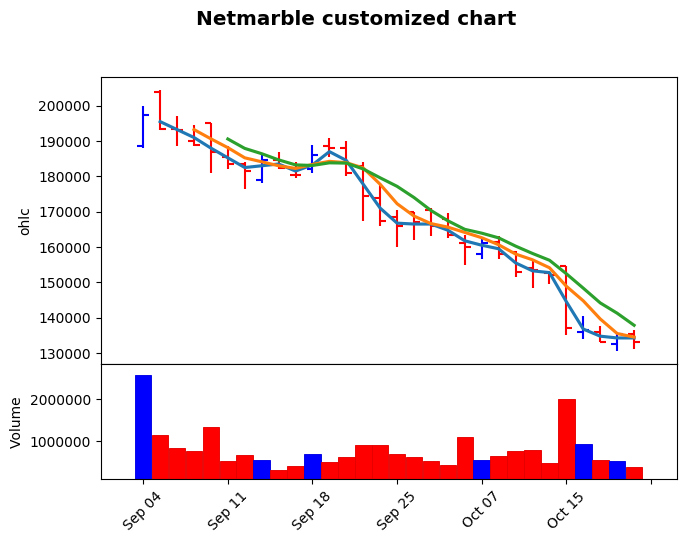

In [65]:
kwargs = dict(title = 'Netmarble customized chart', type = 'ohlc', 
             mav = (2, 4, 6), volume = True, ylabel = 'ohlc')
mc = mpf.make_marketcolors(up = 'b', down = 'r', inherit = True)
s = mpf.make_mpf_style(marketcolors = mc)
mpf.plot(df_part, **kwargs, style = s)